##**TITANIC SURVIVAL PREDICTION**

Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

<img src=https://cdn.mos.cms.futurecdn.net/X2HayNRX94wPEBtGqg7MJE-1200-80.jpg.webp>

##***Import Libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


##***Data Loading and exploration***

In [ ]:
train_data = pd.read_csv("/content/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##***Data Pre-processing***
### Checking for Null values

In [ ]:
print(train_data.isna().sum()) # Number of null values in each columns
print("\nTotal No. of Null Values:", train_data.isna().values.sum()) # Total Number of null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Total No. of Null Values: 866


###Handling Null Values

In [ ]:
train_data.drop(['Cabin', 'Name', 'Ticket', 'PassengerId' ], axis=1, inplace=True) # Dropping irrelivent Columns

train_data.Age.fillna(train_data.Age.mean(), inplace=True) # Replacing null values of by mean

train_data["Embarked"].fillna(train_data["Embarked"].mode()[0], inplace=True) # Replacing null values of by maximum occuring value


In [ ]:
# Rechecking again for null values

print(train_data.isna().sum())
print("\nTotal No. of Null Values:", train_data.isna().values.sum() )

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Total No. of Null Values: 0


##***Data Visualization***

<Axes: xlabel='Sex', ylabel='count'>

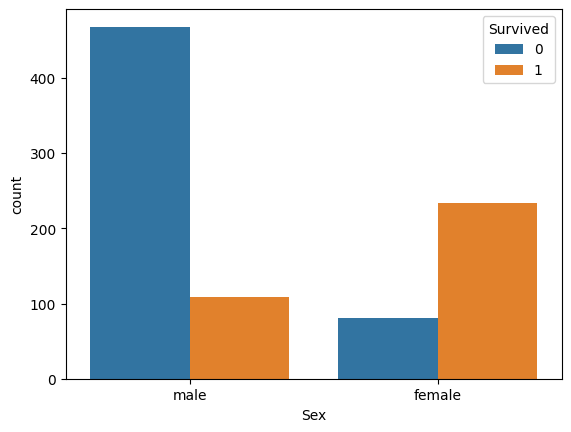

In [ ]:
sns.countplot(data=train_data, x="Sex", hue="Survived")

Number of females survived were more than number of males survived

male      577
female    314
Name: Sex, dtype: int64


<Axes: xlabel='Pclass', ylabel='count'>

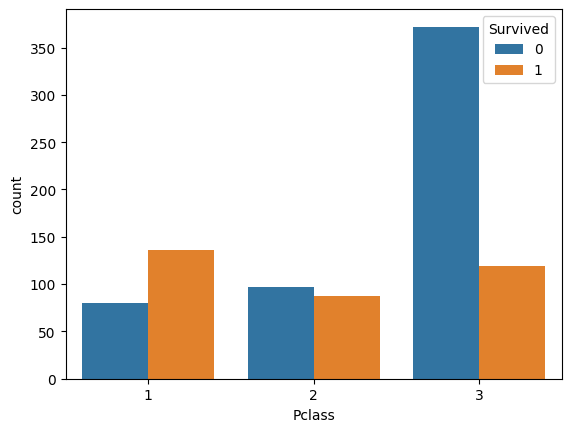

In [ ]:
print(train_data.Sex.value_counts())
sns.countplot(data=train_data, x="Pclass", hue="Survived")

The most number of death were of mens from 3rd class almost above 350+ death

male      577
female    314
Name: Sex, dtype: int64


<Axes: xlabel='Embarked', ylabel='count'>

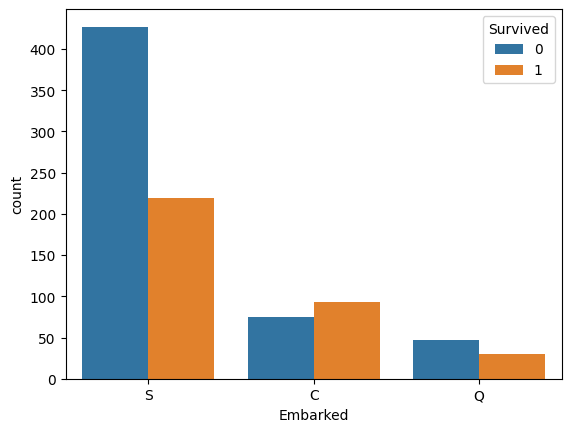

In [ ]:
print(train_data.Sex.value_counts())
sns.countplot(data=train_data, x="Embarked", hue="Survived")

## ***Data Standardization***

In [ ]:
train_data.replace({'Sex' : {'male' : 0, 'female' : 1}}, inplace=True)

train_data.replace({'Embarked':{'S' : 0, 'C' : 1, 'Q' : 2}}, inplace=True)

### Data preparation form model training and testing

In [ ]:
x_data = train_data.drop('Survived', axis = 1)
y_data = train_data['Survived']
print(x_data, y_data)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns] 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


###Spliting Data into train and test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=5)

## ***Model Training using Logistic Regression***

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##***Testing Model***

In [ ]:
x_test_prediction = model.predict(x_test)
print(x_test_prediction)
print("Accuracy Score: ", accuracy_score(x_test_prediction, y_test))

[0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0
 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0
 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1
 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1
 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 1]
Accuracy Score:  0.8208955223880597


##***Application***
### Importing Data

In [ ]:
test_data = pd.read_csv("/content/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


###Data Preprocessing

In [ ]:
print(test_data.isna().sum())
print("\nTotal No. of Null Values:", test_data.isna().values.sum() )

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Total No. of Null Values: 414


In [ ]:
test_data.drop(['Cabin', 'Name', 'Ticket', 'PassengerId' ], axis=1, inplace=True)
test_data.Age.fillna(test_data.Age.mean(), inplace=True)
test_data["Fare"].fillna(test_data["Fare"].mean(), inplace=True)
test_data["Embarked"].fillna(test_data["Embarked"].mode()[0], inplace=True)

In [ ]:
print(test_data.isna().sum())
print("\nTotal No. of Null Values:", test_data.isna().values.sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Total No. of Null Values: 0


In [ ]:
test_data.replace({'Sex' : {'male' : 0, 'female' : 1}}, inplace=True)
test_data.replace({'Embarked':{'S' : 0, 'C' : 1, 'Q' : 2}}, inplace=True)

##***Predicting values***

In [ ]:
Prediction = model.predict(test_data)
print(Prediction)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


###Checking Accuracy

In [ ]:
test_data_actual = pd.read_csv("/content/gender_submission.csv")
test_data_actual.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
test_actual_y_data = test_data_actual['Survived']
print(test_actual_y_data)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [ ]:
print("Accuracy Score: ", accuracy_score(Prediction, test_actual_y_data))

Accuracy Score:  0.9473684210526315
